In [50]:
# Load MLP model trained from day 15 - 16

import keras
from keras.models import load_model

model = load_model('mnist_mlp.h5')

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.weights

[<tf.Variable 'dense_3_1/kernel:0' shape=(784, 512) dtype=float32_ref>,
 <tf.Variable 'dense_3_1/bias:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'dense_4_1/kernel:0' shape=(512, 10) dtype=float32_ref>,
 <tf.Variable 'dense_4_1/bias:0' shape=(10,) dtype=float32_ref>]

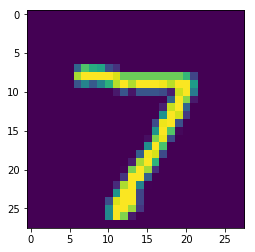

7


In [53]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

data = X_test[0]
label = y_test[0]
plt.imshow(data)
plt.show()
print(label)

In [54]:
X_test.shape

(10000, 28, 28)

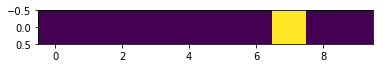

In [55]:
import numpy as np

data2 = data.reshape(1, 784)
data2 = data2.astype('float32')
data2 /= 255

output = model.predict(data2)

output = output.reshape(1, -1) # make it look like image
plt.imshow(output) # show image

In [59]:
# evaluate
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# pre-process test data
# MLP only receives vectors, so we flatten 28x28 to 784
X_test = X_test.reshape(-1, 784) # from (-1, 28, 28) to (-1, 784)

# Convert element datatype to float32 because Tensorflow prefers it
# https://stackoverflow.com/questions/43406876/cant-use-float64-in-keras-with-tensorflow-backend
X_test = X_test.astype('float32')

# scale to between 0 and 1 because gradient descent is faster
# image pixel values range from 0 to 255
X_test /= 255

num_classes = 10 # 10 digits
y_test = keras.utils.to_categorical(y_test, num_classes)

# model.evaluate()
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 86us/step


[0.23022360926419497, 0.9371]

In [61]:
model.metrics_names

['loss', 'acc']

In [71]:
# fine tune existing model
#
# 1. continue training: change all layers
# 2. fine-tune: only change some layers
#

# pre-process train data

X_train = X_train.reshape(-1, 784) # from (-1, 28, 28) to (-1, 784)

# Convert element datatype to float32 because Tensorflow prefers it
# https://stackoverflow.com/questions/43406876/cant-use-float64-in-keras-with-tensorflow-backend
X_train = X_train.astype('float32')

# scale to between 0 and 1 because gradient descent is faster
# image pixel values range from 0 to 255
X_train_scaled = X_train / 255

y_train_cat = keras.utils.to_categorical(y_train, num_classes)

In [76]:
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
import time

filepath = 'mnist_mlp.chkpt.h5' # save_best_only
#filepath = 'mnist_mlp.{epoch:02d}-{val_loss:.4f}.h5' # keep everything
modelcheckpoint = ModelCheckpoint(filepath, save_best_only=True)

earlystop = EarlyStopping(patience=2)
tensorboard = TensorBoard(log_dir='./logs/mnist_mlp/%d' % time.time())

history = model.fit(X_train_scaled, y_train_cat, batch_size=128, epochs=3,
                    callbacks=[tensorboard, earlystop, modelcheckpoint],
                    validation_split=.25)

Train on 45000 samples, validate on 15000 samples
Epoch 1/3
45000/45000 [==============================] - 6s 142us/step - loss: 0.1288 - acc: 0.9652 - val_loss: 0.1507 - val_acc: 0.9573
Epoch 2/3
45000/45000 [==============================] - 7s 147us/step - loss: 0.1274 - acc: 0.9658 - val_loss: 0.1497 - val_acc: 0.9575
Epoch 3/3
45000/45000 [==============================] - 6s 134us/step - loss: 0.1260 - acc: 0.9663 - val_loss: 0.1483 - val_acc: 0.9577
